In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1= pd.read_csv("D:\\Datasets\\true_car_listings.csv")

In [3]:
df1.shape

(852122, 8)

In [4]:
df2= pd.read_csv("D:\\Datasets\\tc20171021.csv", error_bad_lines=False, warn_bad_lines=False)

In [5]:
df2.head()

,Id,Price,Year,Mileage,City,State,Vin,Make,Model
0,1,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,2,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,3,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,4,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,5,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience


In [6]:
df2.shape

(1216250, 9)

In [7]:
df= pd.concat([df1, df2], ignore_index=True)
df= df.drop('Id', axis=1)

In [8]:
df.shape

(2068372, 8)

In [9]:
df.tail()

,Price,Year,Mileage,City,State,Vin,Make,Model
2068367,79900,2017,25,East Hanover,NJ,YV4BC0ZX0H1128239,Volvo,XC90T8
2068368,80895,2017,10,Corte Madera,CA,YV4BC0ZX0H1124188,Volvo,XC90T8
2068369,68755,2018,2500,Englewood,NJ,YV4A22PL4J1212676,Volvo,XC90T6
2068370,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
2068371,60240,2017,8342,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90


In [10]:
df.describe()

,Price,Year,Mileage
count,2.068372e+06,2.068372e+06,2.068372e+06
mean,2.117289e+04,2.013300e+03,5.274318e+04
std,1.334331e+04,3.430814e+00,6.836142e+04
min,1.500000e+03,1.997000e+03,5.000000e+00
25%,1.299500e+04,2.012000e+03,2.391000e+04
50%,1.800000e+04,2.014000e+03,4.042300e+04
75%,2.681700e+04,2.016000e+03,7.250400e+04
max,4.995000e+05,2.018000e+03,7.758776e+07


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068372 entries, 0 to 2068371
Data columns (total 8 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   Price    int64 
 1   Year     int64 
 2   Mileage  int64 
 3   City     object
 4   State    object
 5   Vin      object
 6   Make     object
 7   Model    object
dtypes: int64(3), object(5)
memory usage: 126.2+ MB


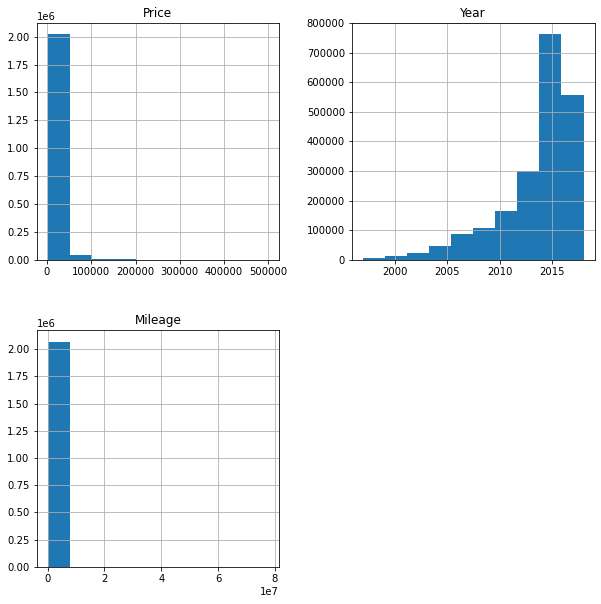

In [12]:
df.hist(figsize=(10,10))
plt.show()

In [13]:
df.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

##### Handling the Outliers

<AxesSubplot:title={'center':'Boxplot for Mileage'}, xlabel='Mileage'>

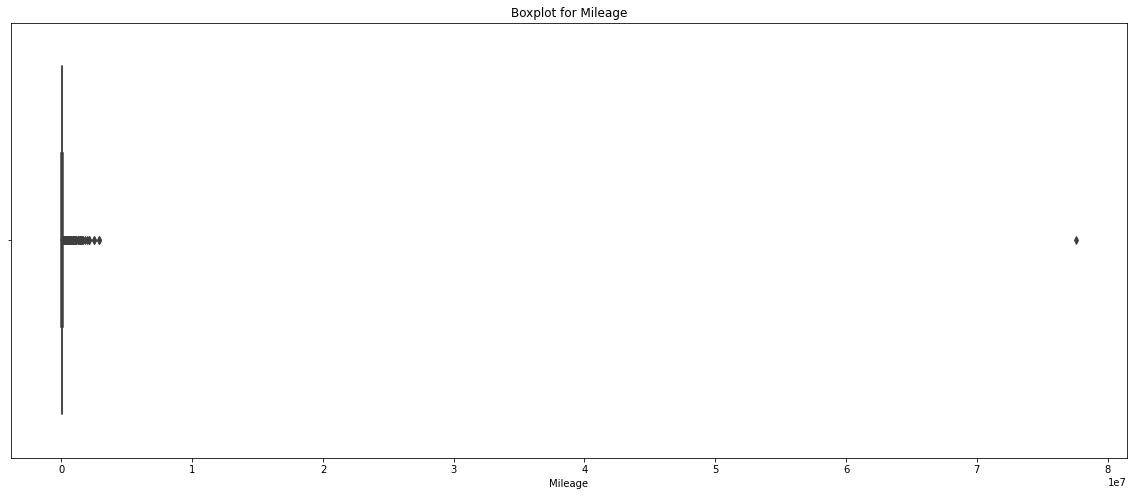

In [14]:
plt.figure(figsize=(20,8))
plt.title('Boxplot for Mileage')
sns.boxplot(x=df.Mileage)

In [15]:
Q1= df['Mileage'].quantile(0.25)
Q3= df['Mileage'].quantile(0.75)
IQR= Q3-Q1
Lower= Q1- 1.5*IQR
Upper= Q3+ 1.5*IQR

In [16]:
Lower

-48981.0

In [17]:
Upper

145395.0

In [18]:
Mil_outliers= df[(df['Mileage']>Upper) | (df['Mileage']<Lower)]
Mil_outliers.shape

(76247, 8)

#### We see that there are 76247 outliers, it is not practical to remove the outliers directly hea=nce we replace it with highest and lowest values

In [19]:
for i,data in df.iterrows():
    if data['Mileage']> Upper:
        df.at[i,'Mileage'] = Upper  
    if data['Mileage']< Lower:
        df.at[i,'Mileage'] = Lower 

<AxesSubplot:xlabel='Mileage'>

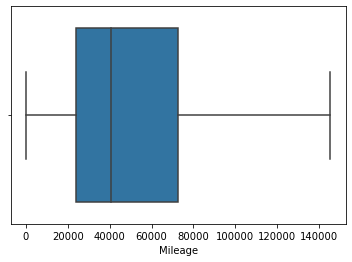

In [20]:
sns.boxplot(x=df.Mileage)

#### Similarly working on other numerical variables

<AxesSubplot:title={'center':'Boxplot for Year'}, xlabel='Year'>

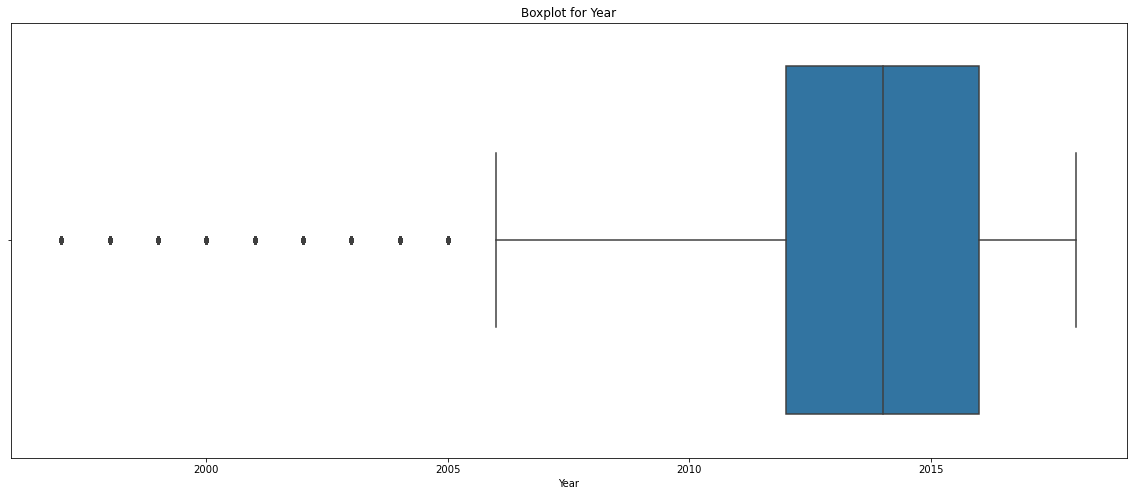

In [21]:
plt.figure(figsize=(20,8))
plt.title('Boxplot for Year')
sns.boxplot(x=df.Year)

<AxesSubplot:xlabel='Year', ylabel='count'>

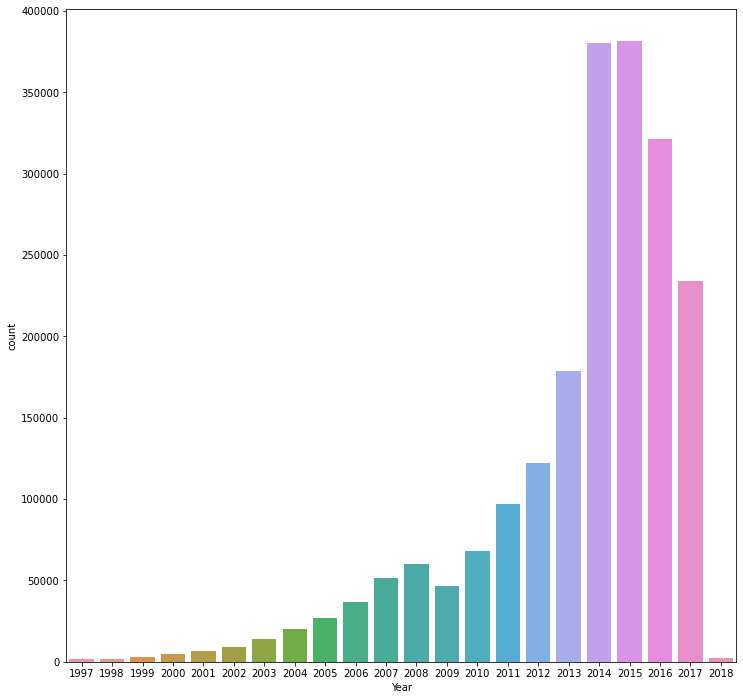

In [22]:
plt.figure(figsize=(12,12))
sns.countplot(x='Year', data=df)

In [23]:
Q1= df['Year'].quantile(0.25)
Q3= df['Year'].quantile(0.75)
IQR= Q3-Q1
Lower= Q1- 1.5*IQR
Upper= Q3+ 1.5*IQR

In [24]:
Lower

2006.0

In [25]:
Upper

2022.0

In [26]:
Year_outliers= df[(df['Year']>Upper) | (df['Year']<Lower)]
Year_outliers.shape

(87108, 8)

In [27]:
Year_outliers.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
97,8572,2004,51293,Fairfax,VA,JH4CL96834C036838,Acura,TSXAutomatic
590,8998,2005,73406,Burlington,MA,JH4CL96935C003820,Acura,TSXAutomatic
694,7488,2005,93940,Lake Park,FL,JH4CL96895C018118,Acura,TSXAutomatic
782,5995,2005,105743,Riverdale,NJ,JH4CL968X5C005197,Acura,TSXAutomatic
817,7990,2005,82451,Downtingtown,PA,JH4CL96815C032417,Acura,TSXAutomatic


##### We see that there is significant amount of data before and after the upper and lower quantiles, thereforeit is not feasible to change the Year data to Upper or Lower quantiles

<AxesSubplot:title={'center':'Boxplot for Price'}, xlabel='Price'>

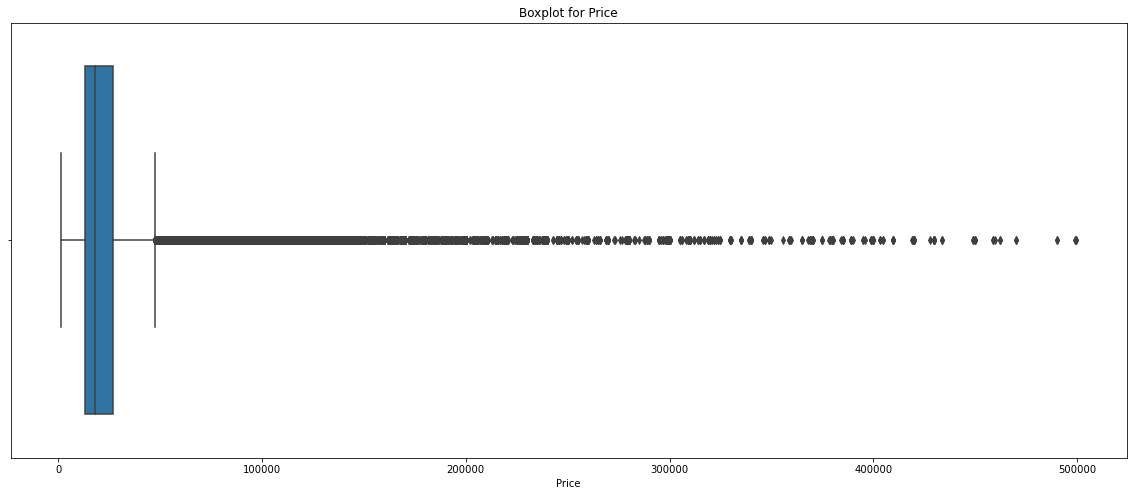

In [28]:
plt.figure(figsize=(20,8))
plt.title('Boxplot for Price')
sns.boxplot(x=df.Price)

In [29]:
Min= df['Price'].quantile(0.01)
Max= df['Price'].quantile(0.99)

In [30]:
Min

3995.0

In [31]:
Max

59999.0

In [32]:
(df[df['Price']>Max]).count()

Price      20626
Year       20626
Mileage    20626
City       20626
State      20626
Vin        20626
Make       20626
Model      20626
dtype: int64

In [33]:
(df[df['Price']<Min]).count()

Price      19682
Year       19682
Mileage    19682
City       19682
State      19682
Vin        19682
Make       19682
Model      19682
dtype: int64

In [34]:
df['Price'].min()

1500

In [35]:
Price_outliers= df[(df['Price']>Max) | (df['Price']<Min)]
Price_outliers.shape

(40308, 8)

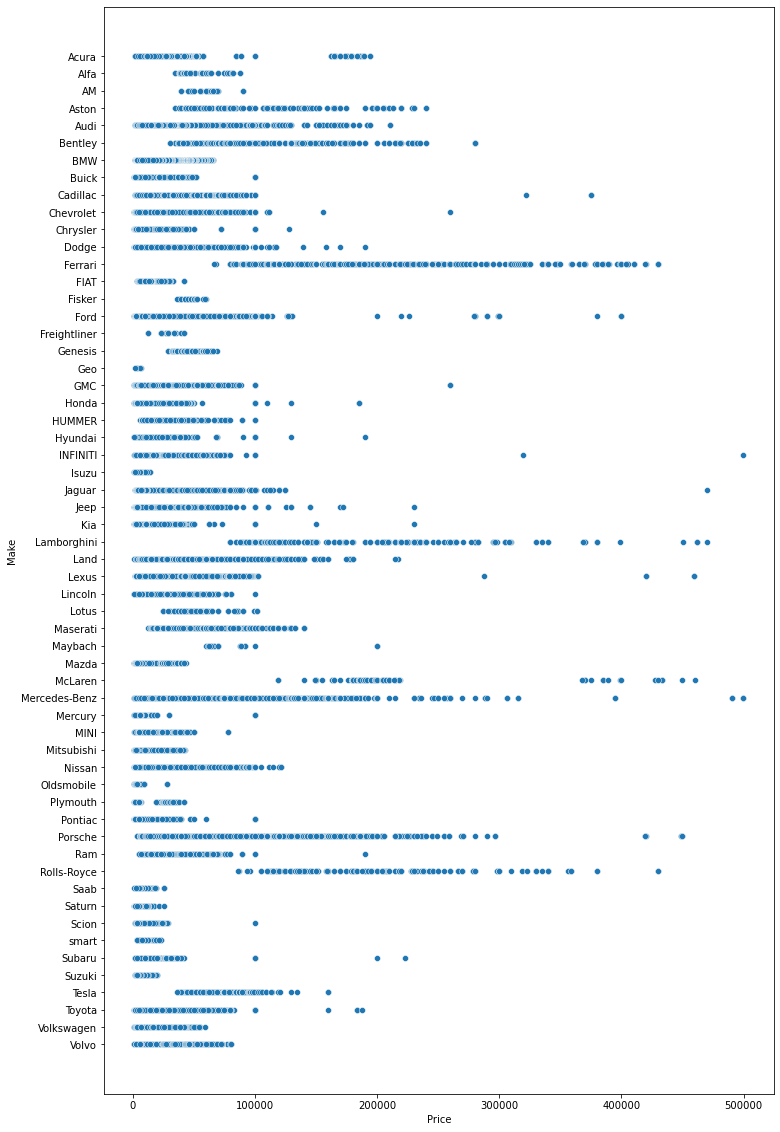

In [36]:
plt.figure(figsize=(12,20))
sns.scatterplot(x=df['Price'], y = df['Make'])
plt.show()

##### As shown in the graph, most of the cars have their prices around the range [0,200000] , except some luxury cars like Ferrari, Lambo, Mercedes and Rolls Royce. 

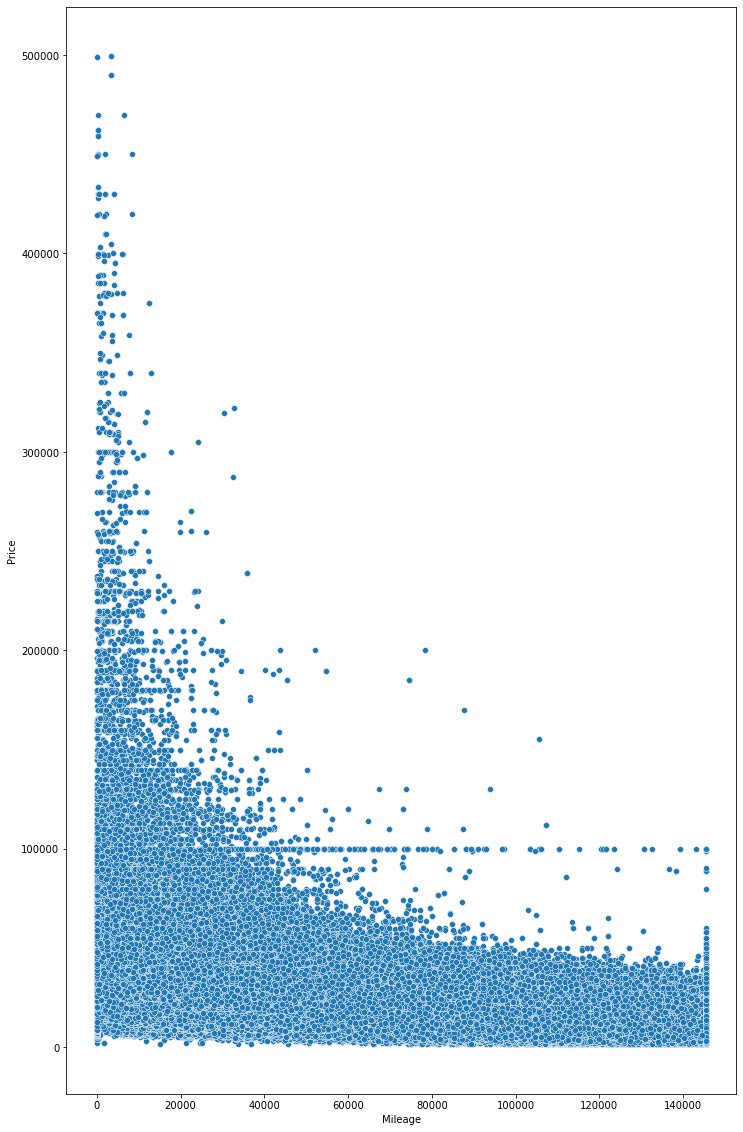

In [37]:
plt.figure(figsize=(12,20))
sns.scatterplot(x=df['Mileage'], y = df['Price'])
plt.show()

##### We  see that there is a negative relationship between Price and Mileage, i.e. as Mileage increases the value of car decreases

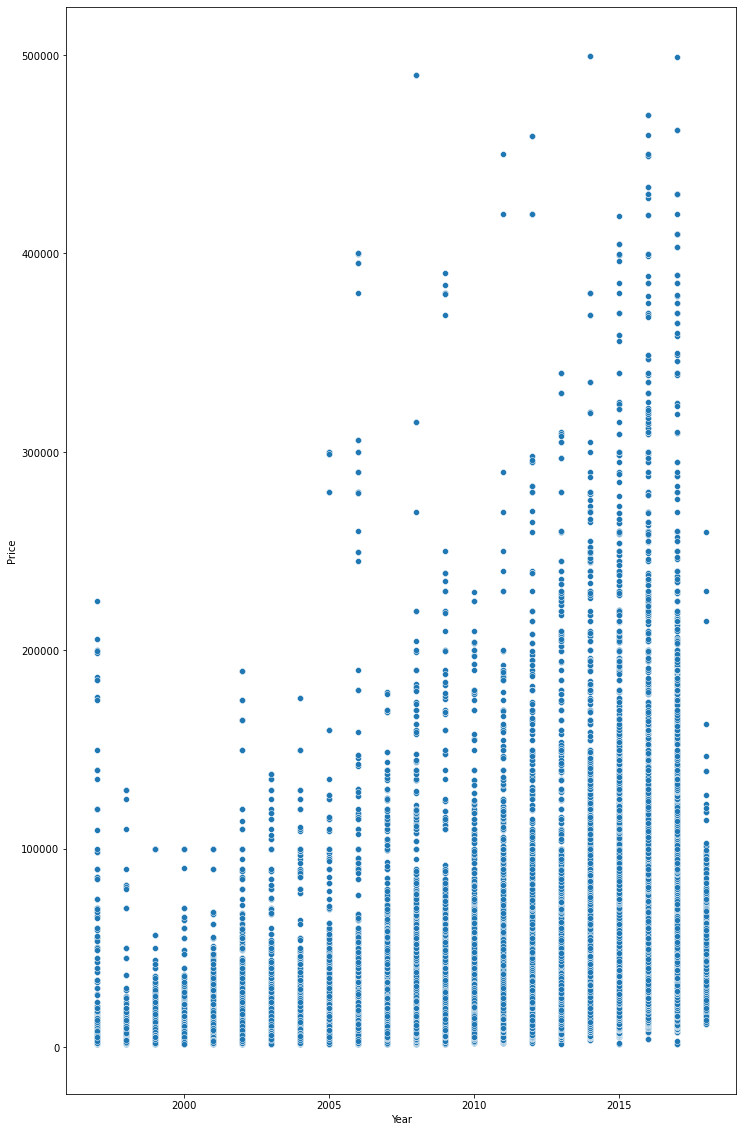

In [38]:
plt.figure(figsize=(12,20))
sns.scatterplot(x=df['Year'], y = df['Price'])
plt.show()

##### Prices tend to be higher as cars are more recent, and viceversa.

<AxesSubplot:xlabel='Make', ylabel='Price'>

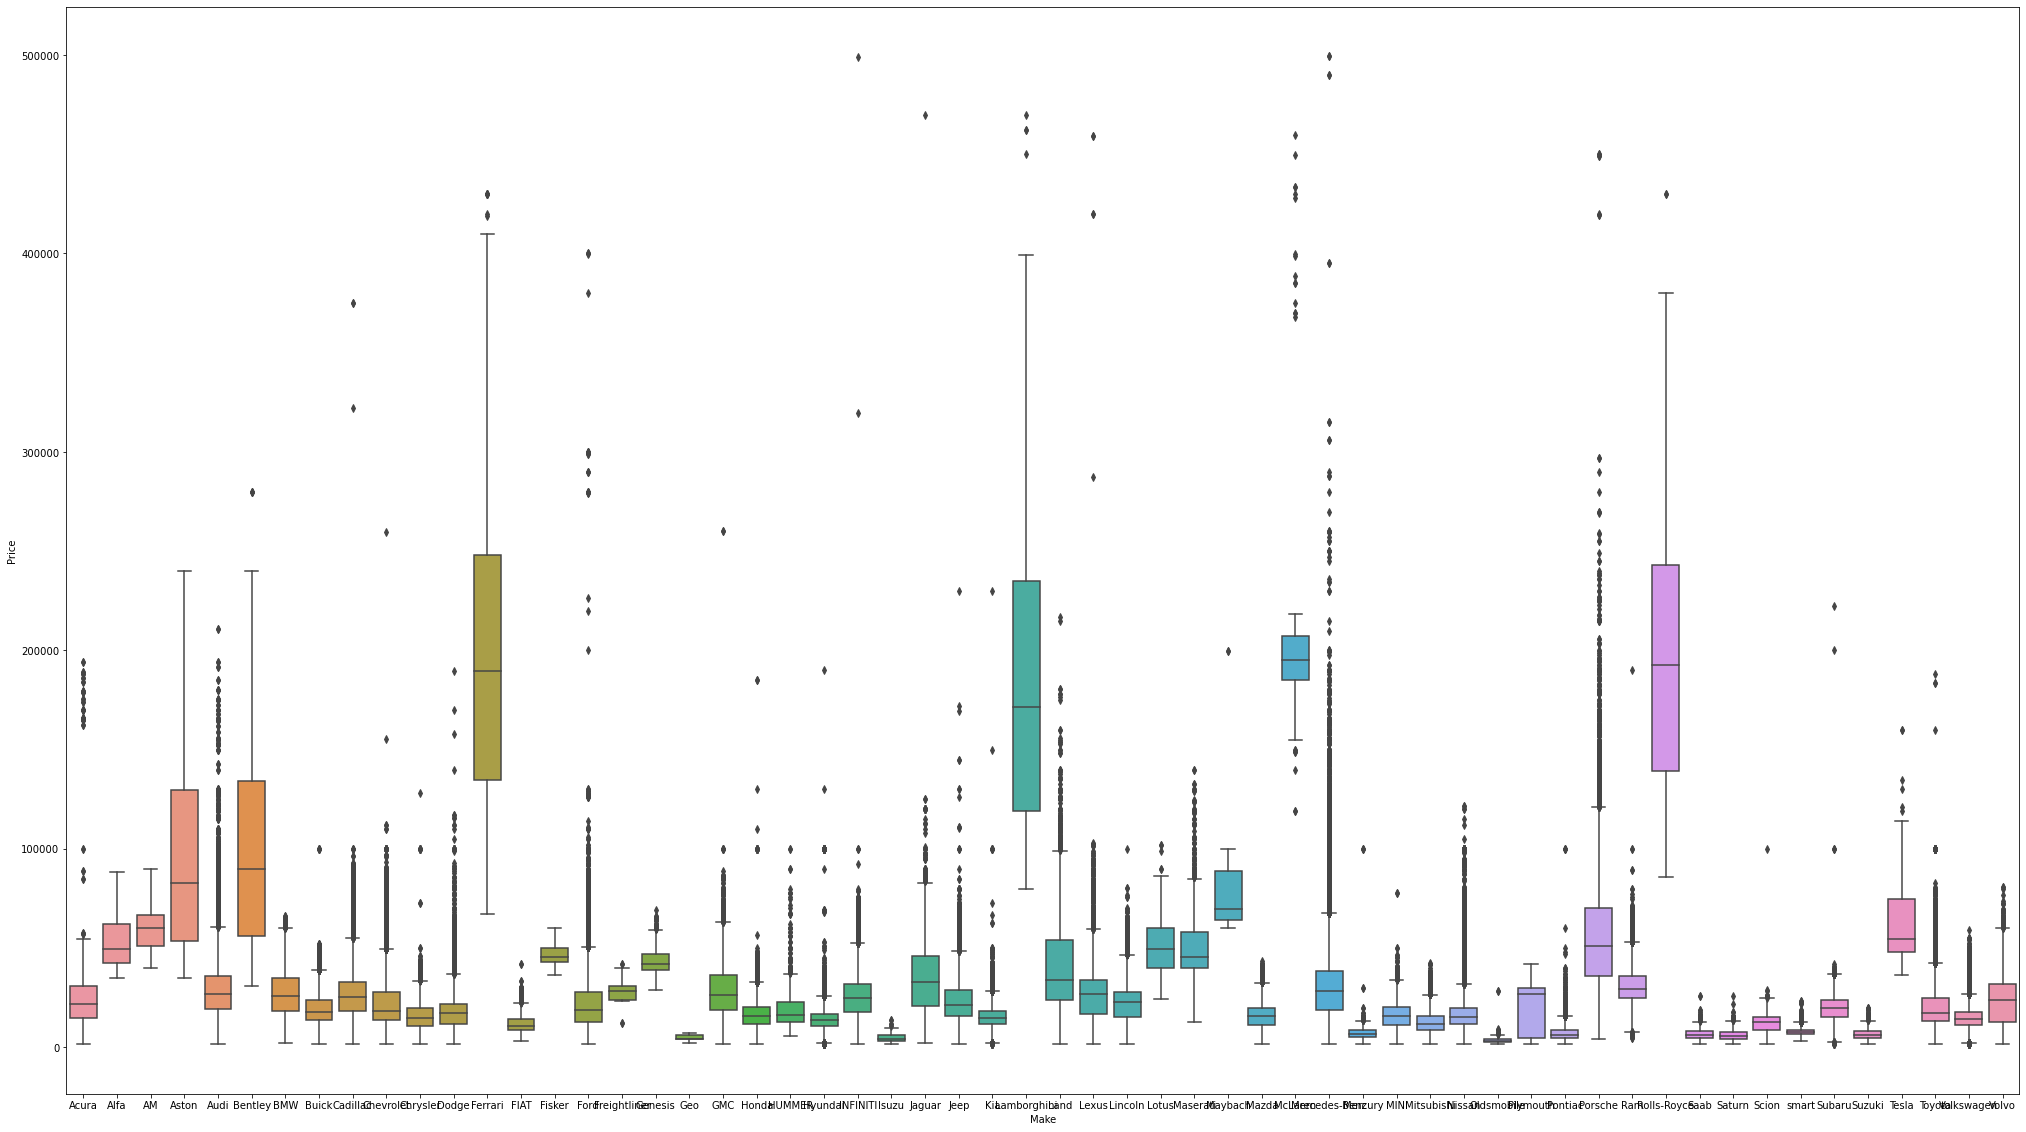

In [39]:
plt.subplots(figsize=(35, 20))
sns.boxplot(x='Make', y='Price', data=df)

##### We see that there are quite some outliers in the medium budget cars like Audi, Jeep, Ford, this is because they also produce some high end cars that are over their normal prices. These outliers must not be removed as they represent variedness in the type of cars companies produce

### Correlation between variables

In [40]:
corr = df.corr()
corr.sort_values(["Price"], ascending = False, inplace = True)
corr.Price

Price      1.000000
Year       0.403628
Mileage   -0.443448
Name: Price, dtype: float64

<AxesSubplot:>

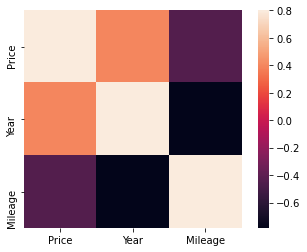

In [41]:
sns.heatmap(corr, vmax=.8, square=True)

##### There is a mild positive correlation between Year and Price and a mild negative correlation between Year and Mileage.Moreover the is a strong negative correlation between Mileage and Year, meaning that the older is the car, the higher will be its mileage.

In [42]:
df.State.unique()

array([' TX', ' NY', ' CO', ' UT', ' FL', ' CT', ' ID', ' ND', ' CA',
       ' NJ', ' OH', ' VA', ' IN', ' AZ', ' OR', ' KS', ' NE', ' MA',
       ' MD', ' GA', ' MN', ' HI', ' LA', ' NM', ' IL', ' AL', ' PA',
       ' SC', ' NC', ' WA', ' WI', ' OK', ' KY', ' MS', ' MO', ' ME',
       ' AR', ' MI', ' NV', ' TN', ' Fl', ' NH', ' DE', ' WV', ' Az',
       ' VT', ' SD', ' IA', ' RI', ' ga', ' Oh', ' MT', ' DC', ' AK',
       ' Va', ' WY', ' Md', ' Ca', ' Ga'], dtype=object)

In [43]:
df['State']= df['State'].str.strip()
df['State']= df['State'].str.upper()
df['State'].unique()

array(['TX', 'NY', 'CO', 'UT', 'FL', 'CT', 'ID', 'ND', 'CA', 'NJ', 'OH',
       'VA', 'IN', 'AZ', 'OR', 'KS', 'NE', 'MA', 'MD', 'GA', 'MN', 'HI',
       'LA', 'NM', 'IL', 'AL', 'PA', 'SC', 'NC', 'WA', 'WI', 'OK', 'KY',
       'MS', 'MO', 'ME', 'AR', 'MI', 'NV', 'TN', 'NH', 'DE', 'WV', 'VT',
       'SD', 'IA', 'RI', 'MT', 'DC', 'AK', 'WY'], dtype=object)

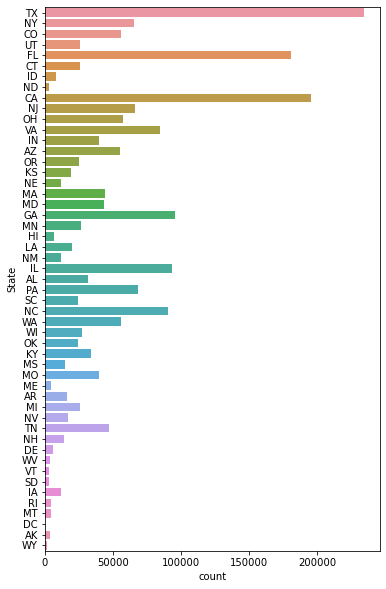

In [44]:
plt.figure(figsize=(6,10))
sns.countplot(y='State', data = df)
plt.show()

##### Most of the sales are done in TX, CA and FL